* # Proyecto: Segmentación de Clientes en ecommerce
    * # PREGUNTAS POSIBLE A CONTESTAR: 
        * # ¿Cuánto es lo que venden en promedio al mes?
            * ### la venta promedio al mes es de 817987 prendas teniendo en cuenta todos los paises
        * # ¿cuántas ventas tienen en cada mes?
            * ### las tengo mas abajo . los meses con mas ventas fueron  | 2021-11=2884 & 2021-10 = 2129 |
        * # ¿cuál es el mes que más venden?
            * ### El mes en el que mas se vendio fue en noviembre ( las tiendas se stockean para la fiestas de fin de año)
        * # ¿quiénes son sus clientes más importantes?
            * ### hay dos tipos de clientes que gastaron en un año arriba de 250,000 con el ID 14646.0 y 18102.0 los demas gastaron menos de 200,000
        * # ¿cuál es el monto promedio que gastan sus clientes?
            * ### el monto que gastan en promedio los clientes es de 418.681
        * # ¿qué porcentaje de sus clientes han vuelto a comprarles?
            * ### El porcentaje de clientes que han vuelto a comprar es: %65.56
        * # ¿cómo se desglosa esta información según los países en donde venden?
            * ### Lo tengo explicado a lo ultimo de todo con detalles
-----
----
# Objetivos del Trabajo

* ### Pre-procesar datos en hojas de cálculo 
* ### Organizar datos en hojas de cálculo
* ### Manipular datos en hojas de cálculo
* ### Visualizar datos en hojas de cálculo
* ### Realizar un análisis por cohorte
* ### Segmentar clientes utilizando el modelo RFM
----

* # Pre-procesar datos en hojas de cálculo:
    * ### identificas datos duplicados, en blanco o fuera de su dominio (por ejemplo, valores negativos cuando no corresponde) con el fin de preparar tus datos para su posterior análisis.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
data = pd.read_csv("./ventas-por-factura.csv")
data.head(12)

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,"199,98"
6,538125,12/9/2020 15:46:00,18225.0,United Kingdom,16,"30,00"
7,544354,2/18/2021 10:42:00,13489.0,United Kingdom,64,"77,28"
8,546369,3/11/2021 11:41:00,15513.0,United Kingdom,10,"67,50"
9,570651,10/11/2021 13:34:00,14911.0,EIRE,86,"321,35"


* ## Lo que se puede entender a primer vistazo es que los N° de factura con el comienzo en "C" es por devoluciones, por eso son montos negativos.
-----

In [141]:
### Informacion del DF extraido
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [142]:
#### Pasaremos la columna "Monto"a valor numerico 
data['Monto'] = data['Monto'].str.replace(',', '.').astype(float)

In [143]:
#### Eliminar datos duplicados 
data = data = data.drop_duplicates(subset="N° de factura", keep="first")

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25900 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25900 non-null  object 
 1   Fecha de factura  25900 non-null  object 
 2   ID Cliente        22190 non-null  float64
 3   País              25900 non-null  object 
 4   Cantidad          25900 non-null  int64  
 5   Monto             25900 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


* ## Eliminamos 53 datos duplicados usando la columna de "N° de factura" (son valores unicos para cada factura) al repetirse los numeros de facturas sabemos que contienen valores duplicados en las demas columnas tambien.
-----


In [145]:
#### Idenfiticar Datos en blanco 

pd.isnull(data["ID Cliente"]).values.ravel().sum()

3710

* ## Si quitariamos datos en blanco en la columnas de ID CLIENTES, Quitariamos datos de 3710 ID CLIENTES con valores Nulos, es decir sin ID ( identificador de Cliente). A mi parecer no seria bueno para los demas valores eliminar 3710 filas de datos.
---

In [146]:
conteo_menos_cero = (data["Monto"]< 0).sum()

print("Número de valores menores a 0 en la columna 'Monto' son :", conteo_menos_cero)


Número de valores menores a 0 en la columna 'Monto' son : 3838


In [147]:
### Creamos un data frame sin nulos en las siguientes columnas que consideramos importante para el previo análisis
data = data.dropna(subset=['Monto'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25900 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25900 non-null  object 
 1   Fecha de factura  25900 non-null  object 
 2   ID Cliente        22190 non-null  float64
 3   País              25900 non-null  object 
 4   Cantidad          25900 non-null  int64  
 5   Monto             25900 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


In [148]:
### Ahora pasaremos a eliminar los valores negativos que tengamos en la columna de monto 
data = data[data["Monto"] >=0 ]

In [149]:
### Tambien lo haremos para los valores negativos que se encuentran en cantidad
data = data[data["Cantidad"] >=0 ]

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     20726 non-null  object 
 1   Fecha de factura  20726 non-null  object 
 2   ID Cliente        18536 non-null  float64
 3   País              20726 non-null  object 
 4   Cantidad          20726 non-null  int64  
 5   Monto             20726 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


* ### Nos quedamos con 20726 filas que contiene valores positivos, es decir que eliminamos 5226 filas con valores negativos (tanto en la columna cantidad y monto) y facturas repetidas
----

In [151]:
### Los datos como quedan con los valores Nulos eliminados
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID Cliente,18536.0,15266.224158,1734.178524,12346.0,13773.5000,15176.50,16779.0000,18287.0
Cantidad,20726.0,272.489144,943.274195,1.0,63.0000,145.50,288.0000,80995.0
Monto,20726.0,513.067740,1744.057605,0.0,138.0625,298.55,481.4075,168469.6


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     20726 non-null  object 
 1   Fecha de factura  20726 non-null  object 
 2   ID Cliente        18536 non-null  float64
 3   País              20726 non-null  object 
 4   Cantidad          20726 non-null  int64  
 5   Monto             20726 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [217]:
data_final = "datos_procesados_Ecommerce.xlsx"

In [218]:
data.to_excel(data_final, index=False)

In [219]:
data.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,AÑO - MES,United Kingdom,Fecha primera factura,Cohorte,Recencia,Frecuencia
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03,SI,2021-03-30 16:14:00,2021-03,1038 days 23:33:37.636352,1
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,28988.00,2021-11,SI,2021-02-15 10:49:00,2021-02,799 days 04:22:37.636352,5
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,3054.96,2021-04,SI,2021-04-06 12:08:00,2021-04,897 days 22:38:37.636352,3
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,9462.60,2021-10,SI,2021-10-14 13:35:00,2021-10,811 days 02:57:37.636352,3
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,2286.68,2021-11,NO,2021-10-06 14:37:00,2021-10,808 days 07:09:37.636352,2


-----
-----
# ANÁLISIS DE LAS MÉTRICAS DE VENTAS 📊📊

---
* # Análisis de número de facturas por país

In [156]:
facturas_por_pais = data.groupby("País")["N° de factura"].count().reset_index()
facturas_por_pais.columns = ["País" , "Cantidad de Facturas"]

In [157]:
total_facturas = len(data)

In [158]:
facturas_por_pais["Porcentaje del Total"] = (facturas_por_pais["Cantidad de Facturas"]/ total_facturas)*100

In [159]:
facturas_por_pais = facturas_por_pais.sort_values(by='Cantidad de Facturas', ascending=False)

In [160]:
facturas_por_pais

,País,Cantidad de Facturas,Porcentaje del Total
36,United Kingdom,18784,90.630126
14,Germany,457,2.204960
13,France,392,1.891344
10,EIRE,288,1.389559
3,Belgium,98,0.472836
24,Netherlands,95,0.458361
31,Spain,90,0.434237
27,Portugal,58,0.279842
0,Australia,57,0.275017
33,Switzerland,54,0.260542


* # Este análisis con su orden descendente nos permitirá entender la distribución de las facturas según el país y el peso relativo de cada país en el total de facturas emitidas. 
    * ### Es evidente que los clientes de UK(Reino Unido) son aquellos que realizan la mayor cantidad de compras en el mercado, dado que el negocio nació en ese país. Los siguientes 5 países con mayor cantidad de compras son Alemania, Francia, Irlanda, Bélgica y Paises Bajos.
------

* # Análisis del monto total por país

In [161]:
#Agrupamos los datos
monto_por_pais = data.groupby("País")["Monto"].agg(["sum" , "mean" , "min" , "max" , "std" , "median"]).reset_index()

### Calculamos el monto del DataFrame
monto_total = data["Monto"].sum()

In [162]:
### Calculamos el porcentaje del total
monto_por_pais["Porcentaje del Total"] = (monto_por_pais["sum"]/monto_total)*100
monto_por_pais= monto_por_pais.sort_values(by='Porcentaje del Total', ascending=False)

In [163]:
monto_por_pais

,País,sum,mean,min,max,std,median,Porcentaje del Total
36,United Kingdom,8993543.47,478.787450,0.00,168469.60,1740.944145,285.290,84.574733
24,Netherlands,285446.34,3004.698316,0.00,20277.92,4478.597248,788.160,2.684320
10,EIRE,283249.06,983.503681,1.45,16774.72,1615.627584,651.725,2.663657
14,Germany,228867.14,500.803370,3.00,9341.26,608.916234,356.110,2.152253
13,France,208779.98,532.601990,4.63,8895.76,683.361538,375.135,1.963354
0,Australia,138521.31,2430.198421,61.20,22775.93,5383.783155,429.600,1.302646
31,Spain,61577.11,684.190111,13.25,4146.34,761.000501,431.890,0.579067
33,Switzerland,57089.90,1057.220370,4.95,6207.67,1387.785463,625.965,0.536870
3,Belgium,41196.34,420.370816,34.00,1491.59,286.121729,346.390,0.387408
32,Sweden,38378.33,1066.064722,8.50,5296.96,1441.719237,372.180,0.360907


* # En esta ocasión se puede observar que UK representa el 84,5% del monto de las ventas, sin embargo tenía casi el 90% de las transacciones. Esto quiere decir que existen países que en promedio gastan más por transacción en UK Merch. Esto se puede validar en la columna de “Monto Promedio” donde vemos que UK tiene uno de los promedios más bajos por transacción, mientras que Paises Bajos y Singapur tienen los promedios más altos, seguido por Australia.

* # Otro tema importante y que puede causar ruido es que tenemos transacciones cuyo monto es 0. Este es un punto que vale la pena levantar al cliente para entender más el contexto. Puede ser un error de digitación o puede ser que en algunos casos regalen la mercancía (quizás sin estar al tanto de ello).
-------
------

* # Análisis por cantidad de productos por cada factura

In [164]:
#Agrupamos los datos
cantidad_productos_x_pais = data.groupby("País")["Cantidad"].agg(["sum" , "mean" , "min" , "max", "std" , "median"]).reset_index()

### Calculamos el monto del DataFrame
cantidad_total_productos = data["Cantidad"].sum()

In [165]:
### Calculamos el porcentaje del total
cantidad_productos_x_pais["Porcentaje del Total"] = (cantidad_productos_x_pais["sum"]/cantidad_total_productos)*100
cantidad_productos_x_pais = cantidad_productos_x_pais.sort_values(by='Porcentaje del Total', ascending=False)

In [166]:
cantidad_productos_x_pais

,País,sum,mean,min,max,std,median,Porcentaje del Total
36,United Kingdom,4721094,251.335924,1,80995,918.083738,140.0,83.594547
24,Netherlands,200937,2115.126316,1,14730,3267.750515,452.0,3.557912
10,EIRE,147321,511.531250,1,6198,805.108372,307.0,2.608555
14,Germany,119263,260.969365,1,4282,312.159827,179.0,2.111743
13,France,111607,284.711735,1,5205,370.094916,207.0,1.976181
0,Australia,84209,1477.350877,1,15049,3275.394913,214.0,1.491056
32,Sweden,36083,1002.305556,1,5952,1620.694698,192.5,0.638907
33,Switzerland,30630,567.222222,1,3142,768.887156,298.0,0.542353
31,Spain,27951,310.566667,3,1506,297.881133,223.0,0.494917
20,Japan,25993,1368.052632,3,6432,1595.663550,960.0,0.460248


* ## Vamos a tomar de ejmplo esta vez a "Paises Bajos", podemos observar que la "MEDIANA" es de 452 productos por cada factura. La media es muy elevada y es de 2115 productos por factura (pero tengamos en cuenta que hay facturas por un solo productos si corroboramos el minimo y el maximo de sus puntos.
-----

---
* # Facturas generadas por mes - GRAFICA 

In [167]:
data["Fecha de factura"] = pd.to_datetime(data["Fecha de factura"])
data["AÑO - MES"] = data["Fecha de factura"].dt.to_period("M")

In [168]:
data.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,AÑO - MES
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11


In [169]:
facturas_x_mes = data.groupby("AÑO - MES").size()

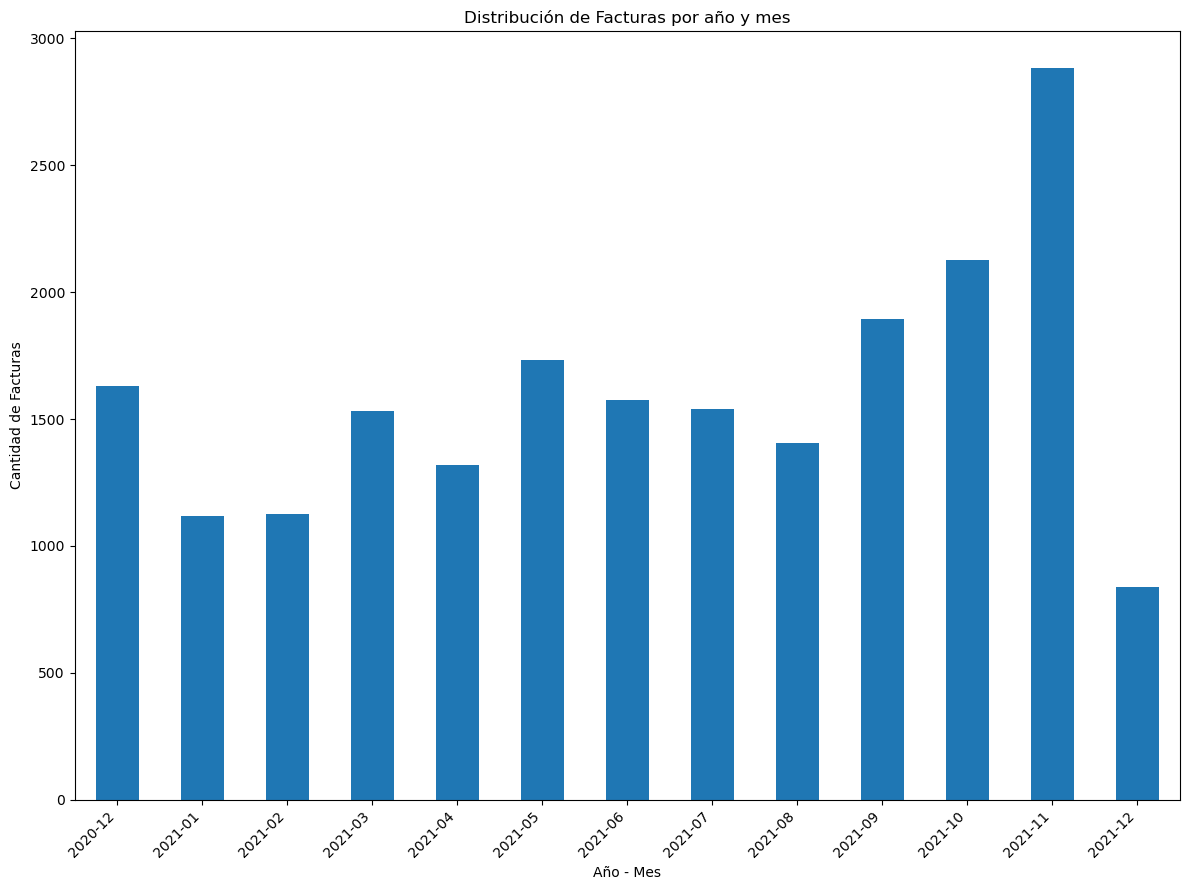

In [170]:
plt.figure(figsize=(12,9))
facturas_x_mes.plot(kind="bar")
plt.title("Distribución de Facturas por año y mes")
plt.xlabel('Año - Mes')
plt.ylabel('Cantidad de Facturas')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

* ### No podemos asegurar que hay una estacionalidad ya que sólo tenemos un año de historia de datos. Pero algo que se aprecia es que en Noviembre hay un crecimiento grande en las ventas. (Puede deberse a las ventas de las fiestas navideñas pero aún asi se puede también ver muy bien que la caida en diciembre es casualmente la mas baja de todas) 

In [171]:
data.head(20)

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,AÑO - MES
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11
6,538125,2020-12-09 15:46:00,18225.0,United Kingdom,16,30.00,2020-12
7,544354,2021-02-18 10:42:00,13489.0,United Kingdom,64,77.28,2021-02
8,546369,2021-03-11 11:41:00,15513.0,United Kingdom,10,67.50,2021-03
9,570651,2021-10-11 13:34:00,14911.0,EIRE,86,321.35,2021-10
11,539736,2020-12-21 15:18:00,NaN,United Kingdom,143,1172.46,2020-12


In [172]:
data2 = data[data["AÑO - MES"] == "2021-12"]
data2

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,AÑO - MES
14,580987,2021-12-06 16:35:00,17389.0,United Kingdom,96,720.00,2021-12
42,580068,2021-12-01 13:41:00,17321.0,United Kingdom,5,41.25,2021-12
82,580386,2021-12-04 10:29:00,18065.0,United Kingdom,50,188.90,2021-12
115,581482,2021-12-09 09:08:00,17490.0,United Kingdom,228,488.40,2021-12
256,581471,2021-12-08 19:29:00,14702.0,United Kingdom,76,199.29,2021-12
...,...,...,...,...,...,...,...
25630,580295,2021-12-02 13:49:00,17841.0,United Kingdom,52,113.79,2021-12
25697,580704,2021-12-05 16:26:00,17404.0,Sweden,40,238.00,2021-12
25843,581456,2021-12-08 18:42:00,17530.0,United Kingdom,170,215.81,2021-12
25854,580091,2021-12-01 14:37:00,17293.0,United Kingdom,126,194.13,2021-12


* # Podemos observar el problema del por que es muy baja la venta en diciembre
    * # El primer punto que vimos es por que los demas paises se stockearon fuerte para las fiestas navideñas un mes antes
    * # El Otro punto es por que las ventas son solamente en "Reino Unidos" y no a los de mas paises 
-----

* # Número de facturas UK vs extranjeros por mes

In [173]:
data["United Kingdom"] = data["País"].apply(lambda x: "SI" if x == "United Kingdom" else "NO")

In [174]:
data["United Kingdom"].value_counts()

SI    18784
NO     1942
Name: United Kingdom, dtype: int64

In [175]:
tabla_clientes_nuevos = data.groupby('AÑO - MES')['ID Cliente'].nunique().reset_index()
tabla_clientes_nuevos.columns = ['Año-Mes', 'Cantidad de Clientes Nuevos']

In [176]:
tabla_clientes_nuevos

,Año-Mes,Cantidad de Clientes Nuevos
0,2020-12,885
1,2021-01,741
2,2021-02,758
3,2021-03,974
4,2021-04,856
5,2021-05,1056
6,2021-06,991
7,2021-07,949
8,2021-08,935
9,2021-09,1266


<Figure size 1200x900 with 0 Axes>

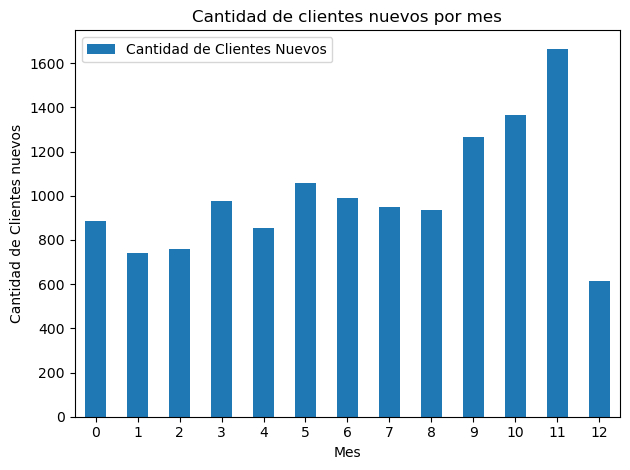

In [177]:
plt.figure(figsize=(12,9))
tabla_clientes_nuevos.plot(kind="bar")
plt.title("Cantidad de clientes nuevos por mes")
plt.xlabel('Mes')
plt.ylabel('Cantidad de Clientes nuevos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

* ## Viendo los numeros y los graficos vemos que tambien el mayor mes con clientes nuevos fue en el mes de noviembre. tambien vemos que los siguientes dos meses con mayor clientes nuevos fue en Octubre y Septiembre
-----


* # LOS CLIENTES QUE MAS GASTARON

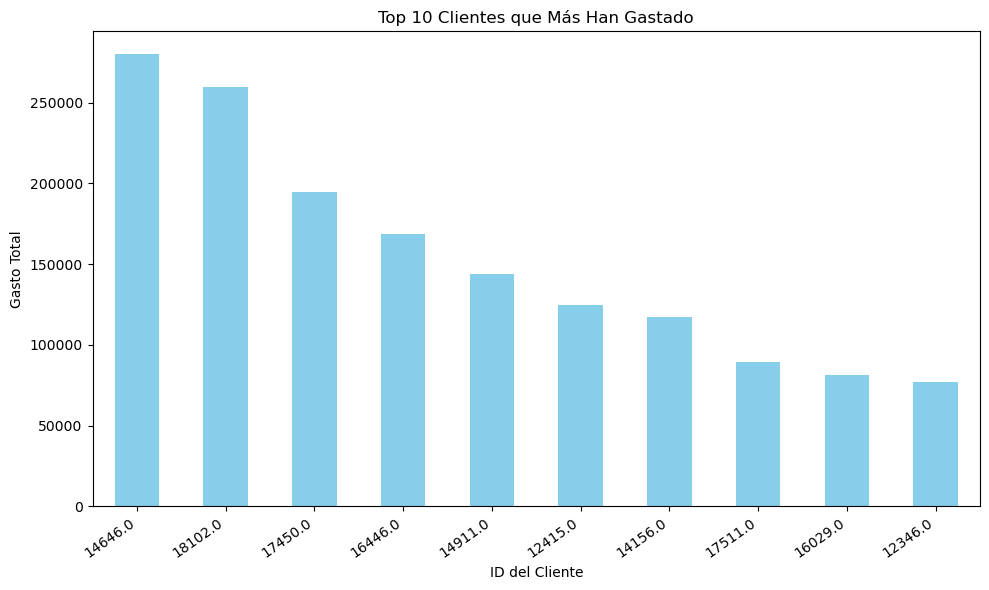

In [178]:
cliente_mayor_gasto = data.groupby('ID Cliente')['Monto'].sum().sort_values(ascending=False)

# Tomar los 10 principales gastadores
top_gastadores = cliente_mayor_gasto.head(10)

# Graficar los principales gastadores
plt.figure(figsize=(10, 6))
top_gastadores.plot(kind='bar', color='skyblue')

# Configurar grafico
plt.title('Top 10 Clientes que Más Han Gastado')
plt.xlabel('ID del Cliente')
plt.ylabel('Gasto Total')
plt.xticks(rotation=35, ha='right')

plt.tight_layout()
plt.show()

In [179]:
ventas_x_mes = data.groupby('AÑO - MES')['Monto'].sum()
promedio_ventas_por_mes = ventas_x_mes.mean()

In [180]:
promedio_ventas_por_mes

817987.8438461537

------
* # CUANTAS VENTAS HAY EN CADA MES

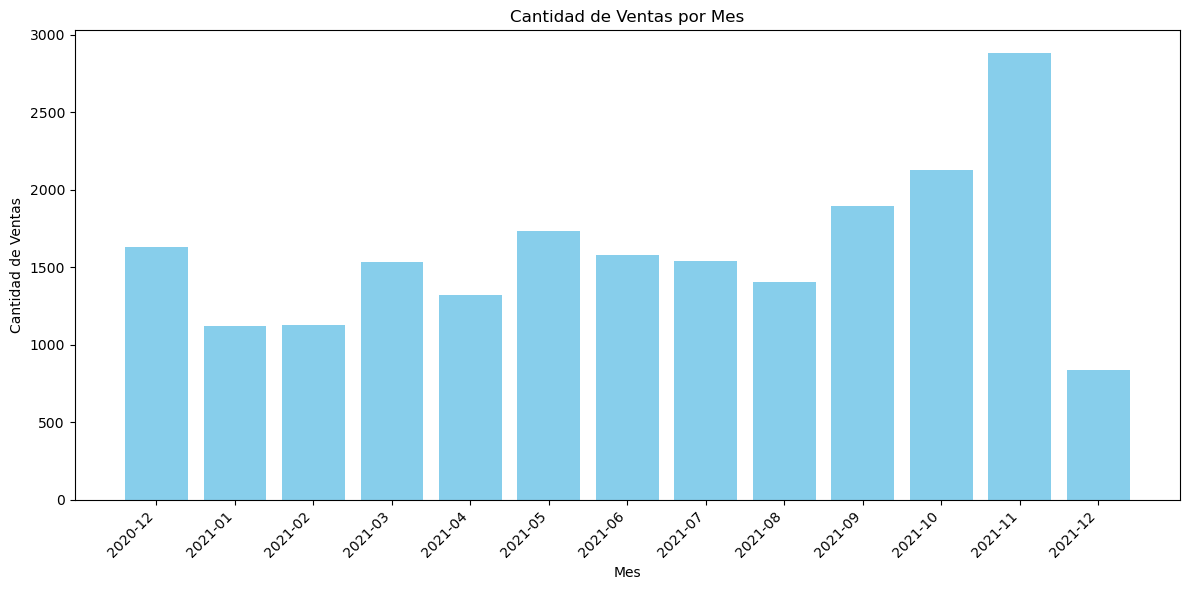

In [181]:
ventas_por_mes = data['AÑO - MES'].value_counts().sort_index()

# Graficar el número de ventas por mes
plt.figure(figsize=(12, 6))
plt.bar(ventas_por_mes.index.astype(str), ventas_por_mes.values, color='skyblue')

# Configuración del gráfico
plt.title('Cantidad de Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [182]:
ventas_por_mes

2020-12    1629
2021-01    1120
2021-02    1126
2021-03    1531
2021-04    1318
2021-05    1731
2021-06    1576
2021-07    1540
2021-08    1407
2021-09    1896
2021-10    2129
2021-11    2884
2021-12     839
Freq: M, Name: AÑO - MES, dtype: int64

In [183]:
# Calcular el monto promedio que gastan los clientes
monto_promedio_x_cliente = data.groupby('ID Cliente')['Monto'].mean()

# Calcular el promedio general de gastos de los clientes
monto_promedio_general = monto_promedio_x_cliente.mean()

# Imprimir el monto promedio general
print("El monto promedio que gastan los clientes es:", monto_promedio_general)

El monto promedio que gastan los clientes es: 418.6812384733104


-------
* # ¿qué porcentaje de sus clientes han vuelto a comprarles?

In [184]:
# Contar la cantidad de compras por cliente
compras_por_cliente = data['ID Cliente'].value_counts()

# Contar la cantidad de clientes que han realizado más de una compra
clientes_recurrentes = (compras_por_cliente > 1).sum()

# Calcular el porcentaje de clientes que han vuelto a comprar
porcentaje_clientes_recurrentes = (clientes_recurrentes / len(compras_por_cliente)) * 100

# Imprimir el porcentaje de clientes recurrentes
print("El porcentaje de clientes que han vuelto a comprar es:", porcentaje_clientes_recurrentes, "%")

El porcentaje de clientes que han vuelto a comprar es: 65.56810324959667 %


------
* # ¿cómo se desglosa esta información según los países en donde venden?

In [185]:
# Calcular el número de ventas por país
ventas_por_pais = data['País'].value_counts()

# Calcular el monto total de ventas por país
monto_total_por_pais = data.groupby('País')['Monto'].sum().sort_values(ascending=False)

# Calcular el monto promedio por venta por país
monto_promedio_por_venta = data.groupby('País')['Monto'].mean().sort_values(ascending=False)

# Calcular el número de clientes por país
clientes_por_pais = data.groupby('País')['ID Cliente'].nunique().sort_values(ascending=False)

# Imprimir los resultados
print("Desglose de información según los países en donde venden:")
print("-------------------------------------------------------")
print("Número de ventas por país:\n", ventas_por_pais)
print("\nMonto total de ventas por país:\n", monto_total_por_pais)
print("\nMonto promedio por venta por país:\n", monto_promedio_por_venta)
print("\nNúmero de clientes por país:\n", clientes_por_pais)

Desglose de información según los países en donde venden:
-------------------------------------------------------
Número de ventas por país:
 United Kingdom          18784
Germany                   457
France                    392
EIRE                      288
Belgium                    98
Netherlands                95
Spain                      90
Portugal                   58
Australia                  57
Switzerland                54
Finland                    41
Italy                      38
Sweden                     36
Norway                     36
Channel Islands            26
Poland                     19
Japan                      19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                13
Hong Kong                  11
Israel                      8
Singapore                   7
Iceland                     7
Canada                      6
Greece                      5
Malta                       5
USA               

---
* # ANÁLISIS DE COHORTES

In [186]:
data["Fecha primera factura"] = data.groupby("ID Cliente")["Fecha de factura"].transform("min")
data.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,AÑO - MES,United Kingdom,Fecha primera factura
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03,SI,2021-03-30 16:14:00
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11,SI,2021-02-15 10:49:00
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04,SI,2021-04-06 12:08:00
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10,SI,2021-10-14 13:35:00
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11,NO,2021-10-06 14:37:00


In [187]:
data['Cohorte'] = data['Fecha primera factura'].dt.to_period('M')
data.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,AÑO - MES,United Kingdom,Fecha primera factura,Cohorte
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03,SI,2021-03-30 16:14:00,2021-03
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11,SI,2021-02-15 10:49:00,2021-02
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04,SI,2021-04-06 12:08:00,2021-04
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10,SI,2021-10-14 13:35:00,2021-10
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11,NO,2021-10-06 14:37:00,2021-10


In [188]:
cohortes_clientes = data.groupby("Cohorte")["ID Cliente"].unique()
print(cohortes_clientes)

Cohorte
2020-12    [18225.0, 15513.0, 14911.0, 17404.0, 12395.0, ...
2021-01    [17389.0, 17988.0, 15841.0, 13764.0, 13614.0, ...
2021-02    [17348.0, 13489.0, 18159.0, 14211.0, 15932.0, ...
2021-03    [15528.0, 15622.0, 12901.0, 15150.0, 17719.0, ...
2021-04    [17045.0, 13719.0, 16103.0, 17956.0, 14111.0, ...
2021-05    [17190.0, 17489.0, 17764.0, 12757.0, 18221.0, ...
2021-06    [16774.0, 13761.0, 17490.0, 16880.0, 14561.0, ...
2021-07    [13933.0, 15051.0, 15623.0, 15618.0, 14456.0, ...
2021-08    [14567.0, 12610.0, 13513.0, 12885.0, 14024.0, ...
2021-09    [16268.0, 14125.0, 13434.0, 13032.0, 13272.0, ...
2021-10    [16416.0, 13816.0, 17321.0, 16020.0, 17549.0, ...
2021-11    [12659.0, 12950.0, 17461.0, 18139.0, 14882.0, ...
2021-12    [15773.0, 13790.0, 17914.0, 14087.0, 16535.0, ...
Freq: M, Name: ID Cliente, dtype: object


In [210]:
periodos_analisis = 6

#### Crear una tabla de retención
retencion = pd.DataFrame(index=data["Cohorte"].unique(),columns=range(1,periodos_analisis+1))

In [211]:
### Calculamos las tasas de Retención

for periodo in range(1, periodos_analisis+1):
    retencion_periodo = data[data["Fecha de factura"] <= data["Fecha primera factura"]+pd.DateOffset(months=periodo-1)]
    cohortes_clientes_periodo = retencion_periodo.groupby("Cohorte")["ID Cliente"].nunique()
    retencion.loc[cohortes_clientes_periodo.index, periodo] = cohortes_clientes_periodo.values

In [198]:
### Creamos un data frame sin nulos en las siguientes columnas xq nos generaba datos NaN y estropeaba el ANÁLISIS
data = data.dropna(subset=['ID Cliente'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18536 entries, 0 to 25951
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   N° de factura          18536 non-null  object         
 1   Fecha de factura       18536 non-null  datetime64[ns] 
 2   ID Cliente             18536 non-null  float64        
 3   País                   18536 non-null  object         
 4   Cantidad               18536 non-null  int64          
 5   Monto                  18536 non-null  float64        
 6   AÑO - MES              18536 non-null  period[M]      
 7   United Kingdom         18536 non-null  object         
 8   Fecha primera factura  18536 non-null  datetime64[ns] 
 9   Cohorte                18536 non-null  period[M]      
 10  Recencia               18536 non-null  timedelta64[ns]
 11  Frecuencia             18536 non-null  float64        
dtypes: datetime64[ns](2), float64(3), int64(1), ob

In [212]:
retencion

,1,2,3,4,5,6
2021-03,452,452,452,452,452,452
2021-02,380,380,380,380,380,380
2021-04,300,300,300,300,300,300
2021-10,358,358,358,358,358,358
2020-12,885,885,885,885,885,885
2021-11,324,324,324,324,324,324
2021-01,417,417,417,417,417,417
2021-05,284,284,284,284,284,284
2021-09,299,299,299,299,299,299
2021-08,169,169,169,169,169,169


* ## En la primera fila, correspondiente a la cohorte de marzo de 2021:
    * #### En el período 1 (primero mes desde su ingreso), hay 452 clientes que continúan siendo clientes.
    * #### En el período 2 (segundo mes desde su ingreso), también hay 452 clientes que continúan siendo clientes.
    * #### Este patrón se repite hasta el período 6, lo que significa que todos los clientes que se unieron en marzo de 2021 aún están activos después de 6 meses.
    ----

* # APLICAMOS ANÁLISIS RFM

In [202]:
from datetime import datetime

In [214]:
fecha_actual = datetime.now()

In [215]:
data['Recencia'] = fecha_actual - data.groupby('ID Cliente')['Fecha de factura'].transform('max')
data['Frecuencia'] = data.groupby('ID Cliente')['Fecha de factura'].transform('nunique')
data['Monto'] = data.groupby('ID Cliente')['Monto'].transform('sum')

In [216]:
data[['ID Cliente', 'Recencia', 'Frecuencia', 'Monto']].head(25)

,ID Cliente,Recencia,Frecuencia,Monto
0,15528.0,1038 days 23:33:37.636352,1,2.293300e+02
1,17348.0,799 days 04:22:37.636352,5,2.898800e+04
3,17045.0,897 days 22:38:37.636352,3,3.054960e+03
4,16416.0,811 days 02:57:37.636352,3,9.462600e+03
5,13816.0,808 days 07:09:37.636352,2,2.286680e+03
6,18225.0,788 days 02:20:37.636352,12,7.933133e+05
7,13489.0,890 days 02:31:37.636352,4,7.192320e+03
8,15513.0,818 days 01:11:37.636352,19,5.327717e+06
9,14911.0,785 days 23:53:37.636352,200,5.802398e+09
13,12659.0,814 days 03:54:37.636352,1,9.168000e+01


In [221]:
data.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,AÑO - MES,United Kingdom,Fecha primera factura,Cohorte,Recencia,Frecuencia
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03,SI,2021-03-30 16:14:00,2021-03,1038 days 23:33:37.636352,1
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,28988.00,2021-11,SI,2021-02-15 10:49:00,2021-02,799 days 04:22:37.636352,5
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,3054.96,2021-04,SI,2021-04-06 12:08:00,2021-04,897 days 22:38:37.636352,3
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,9462.60,2021-10,SI,2021-10-14 13:35:00,2021-10,811 days 02:57:37.636352,3
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,2286.68,2021-11,NO,2021-10-06 14:37:00,2021-10,808 days 07:09:37.636352,2
